In [1]:
import nltk

In [2]:
# run this code to download the resources 
# nltk.download()

In [3]:
from nltk.probability import FreqDist

In [4]:
from nltk.corpus import stopwords

In [5]:
# removing the words which are not useful for preprocessing 

stop_words = set(stopwords.words('english'))

In [6]:
# reading the sample corpus from nltk only

words = nltk.Text(nltk.corpus.gutenberg.words('bryant-stories.txt'))

In [7]:
# checking if all the letters are alphabets or not  
# The isalpha() methods returns “True” if all characters in the string are alphabets, Otherwise, It returns “False”.

words = [word.lower() for word in words if word.isalpha()]

In [8]:
# removing the stop words from our text

words = [word.lower() for word in words if word not in stop_words]

In [9]:
# A frequency distribution records the number of times each outcome of an experiment has occurred.

# = ['rashu','vashu','akshat','rashu']
#Dist = FreqDist(p)

In [10]:
#print(fDist)

In [11]:
#for x,v in fDist.most_common(5):
    #print(x,v)

In [12]:
fDist_words = FreqDist(words)

In [13]:
len(fDist_words)

3688

In [14]:
# total words
print(len(words))

21718


In [15]:
# unique words
print(len(set(words)))

3688


In [16]:
# printing the words with corresponding frquency

from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Word", "Frequency"]
for x,v in fDist_words.most_common(20):
    table.add_row([x,v])
print(table)   

+--------+-----------+
|  Word  | Frequency |
+--------+-----------+
| little |    597    |
|  said  |    453    |
|  came  |    191    |
|  one   |    183    |
| could  |    158    |
|  king  |    141    |
|  went  |    122    |
| would  |    112    |
| great  |    110    |
|  day   |    107    |
|  man   |    107    |
|  old   |    104    |
|  time  |     97    |
|  see   |     97    |
|  like  |     92    |
|  saw   |     92    |
|  away  |     91    |
| mother |     90    |
|  made  |     89    |
|  good  |     84    |
+--------+-----------+


## Now seeing the above data we cannot say anything because we have not normazlized things to same level hence we will divide every word's frequency with the size of the vocabulory to make things normalized.

In [17]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Word", "Frequency/Size of vocabulory"]
for x,v in fDist_words.most_common(20):
    table.add_row([x,v/len(fDist_words)])
print(table)   
    

+--------+------------------------------+
|  Word  | Frequency/Size of vocabulory |
+--------+------------------------------+
| little |      0.1618763557483731      |
|  said  |     0.12283080260303687      |
|  came  |     0.05178958785249458      |
|  one   |     0.04962039045553145      |
| could  |     0.042841648590021694     |
|  king  |     0.038232104121475055     |
|  went  |     0.03308026030368764      |
| would  |     0.03036876355748373      |
| great  |     0.02982646420824295      |
|  day   |     0.02901301518438178      |
|  man   |     0.02901301518438178      |
|  old   |     0.028199566160520606     |
|  time  |     0.026301518438177875     |
|  see   |     0.026301518438177875     |
|  like  |     0.024945770065075923     |
|  saw   |     0.024945770065075923     |
|  away  |     0.02467462039045553      |
| mother |     0.02440347071583514      |
|  made  |     0.024132321041214752     |
|  good  |      0.0227765726681128      |
+--------+------------------------

## Code example for TTR(Type Token Ratio)

In [18]:
#taking two corpus from nltk 1.) bryant theoryu corpus and 2.) austen-emma corpus 
# don't get confused these are just name of some text data readily available in nltk

words_bryant = nltk.Text(nltk.corpus.gutenberg.words('bryant-stories.txt'))

words_emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

In [19]:
# convert to lower case

words_bryant = [word.lower() for word in words_bryant if word.isalpha()]

words_emma = [word.lower() for word in words_emma if word.isalpha()]

In [20]:
# removing the stop words 

# taking the first 20000 words

words_bryant = [word.lower() for word in words_bryant if word not in stop_words][:20000]

words_emma = [word.lower() for word in words_emma if word not in stop_words][:20000]

### It is not reasonable to compare the TTR for two unequal sized documents hence we are taking the first first 20000 tokens for both the documents to get a standardized TTR.

In [21]:
TTR_bryant = len(set(words_bryant))/len(words_bryant)

# number of unique words in our vocabolary/ total number of words in our vocabolary

In [22]:
TTR_emma = len(set(words_emma))/len(words_emma)

# number of unique words in our vocabolary/ total number of words in our vocabolary

In [23]:
print("Bryant Stories - ","Number of tokens are ",len(words_bryant)," Vocabolary Size is ",len(set(words_bryant)),"Type-Token Ratio is ",TTR_bryant)

Bryant Stories -  Number of tokens are  20000  Vocabolary Size is  3435 Type-Token Ratio is  0.17175


In [24]:
print("Austen emma - ","Number of tokens are ",len(words_emma)," Vocabolary Size is ",len(set(words_emma)),"Type-Token Ratio is ",TTR_emma)

Austen emma -  Number of tokens are  20000  Vocabolary Size is  3786 Type-Token Ratio is  0.1893


### Hence we can say that Austen emma has used more vocabolary. TTR is useful for monitoring the vocabolary.

## Zipf's empirical law practically 

In [25]:
import re
from operator import itemgetter
import pandas as pd

In [26]:
frequency = {}

words_emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

In [27]:
# getting the frequency of words in the corpus 

for word in words_emma:
    # https://stackoverflow.com/questions/5235916/word-frequency-program-in-python
    count = frequency.get(word,0)
    frequency[word] = count + 1
    
rank = 1
column_header = ['Rank','Frequency','Frequency*Rank']

df = pd.DataFrame(columns = column_header)

In [28]:
# that is just what operator.itemgetter(1) will give you: A function that grabs the first item from a list-like object.
for word,freq in sorted(frequency.items(),key = itemgetter(1),reverse =True):
    df.loc[word] = [rank,freq,rank*freq]
    rank = rank + 1
print(df)
    

                 Rank Frequency Frequency*Rank
,                   1     11454          11454
.                   2      6928          13856
to                  3      5183          15549
the                 4      4844          19376
and                 5      4672          23360
of                  6      4279          25674
I                   7      3178          22246
a                   8      3004          24032
was                 9      2385          21465
her                10      2381          23810
;                  11      2199          24189
it                 12      2128          25536
in                 13      2118          27534
not                14      2101          29414
"                  15      2004          30060
be                 16      1970          31520
she                17      1778          30226
that               18      1730          31140
you                19      1677          31863
had                20      1606          32120
as           

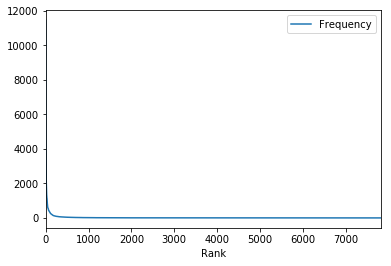

In [33]:
df.plot(x='Rank', y='Frequency')

## We can clearly see from the graph above that frequency and rank are inversely proportional to each other for a word in the corpus.